## Set environment

In [1]:
#Mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

# Enter the repo directory on google colaboratory.
%cd /content/drive/MyDrive/shape-recognition/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/shape-recognition


In [2]:
# Install packages
%pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Training

In [3]:
!wandb disabled

W&B disabled.


In [4]:
!python train.py --data configs/data-2.yaml --epochs 10 --model fasterrcnn_resnet50_fpn_v2 --name data-2 --batch 2 --no-mosaic --device cuda --imgsz 1024

2023-06-25 19:23:26.980200: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 19:23:27.956591: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Not using distributed mode
device cuda
Creating data loaders
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Number of training samples: 

## Visualize Validation Results

In [5]:
import matplotlib.pyplot as plt
import glob as glob

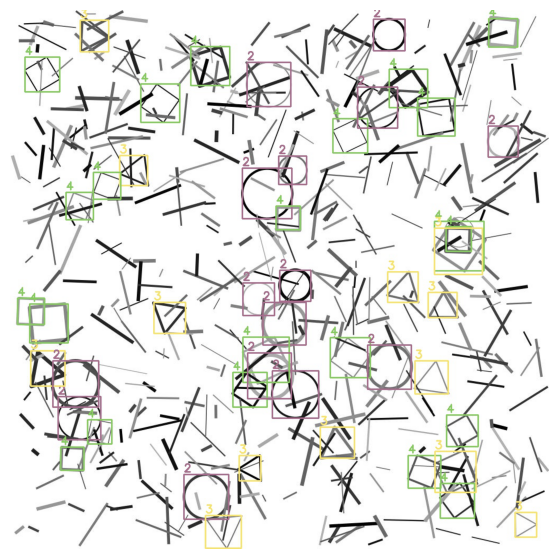

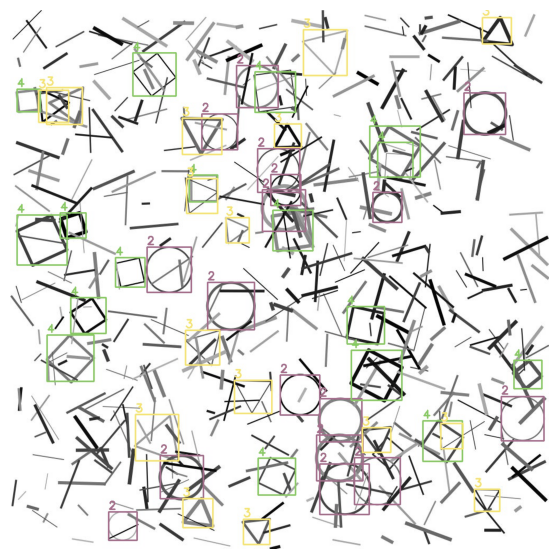

In [6]:
results_dir_path = './outputs/training/data-2'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Evaluation

In [7]:
# Verbose mAP.
!python eval.py --weights outputs/training/data-2/best_model.pth --data configs/data-2.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose --imgsz 1024

2023-06-25 20:22:19.533200: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 20:22:21.083973: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 13/13 [00:25<00:00,  1.96s/it]
counter = 13
3
{'boxes': tensor([[ 652.0854,  564.257